## Understanding Sentiment Analysis and RNNs
### Sentiment Analysis
Definition:

Sentiment analysis is a technique used to determine the emotional tone behind a piece of text. It identifies whether the sentiment is positive, negative, or neutral.

#### Applications:

- Customer Feedback: Understanding customer opinions about products or services.
- Social Media Monitoring: Gauging public sentiment on social media platforms.
- Market Research: Analyzing consumer preferences and trends.
- Political Analysis: Assessing public opinion on political matters.
- Healthcare: Evaluating patient feedback to improve services.

#### How RNNs Differ from Traditional Feedforward Neural Networks
1) Feedforward Neural Networks (FNNs):
- Data flows in one direction from input to output.
- Suitable for tasks with independent input data, like image classification.
2) Recurrent Neural Networks (RNNs):
- Data flows in a loop, allowing the network to retain memory of previous inputs.
- Ideal for sequential data where inputs are dependent on previous ones, like language processing.

#### Hidden States and Information Passing in RNNs
1) Hidden States: Vectors that store information about previous inputs, acting as the network's memory.
2) Information Passing:
- Initialization: Starts with a zero vector or a learned parameter.
- Update: At each time step, the hidden state is updated based on the current input and the previous hidden state, enabling the network to capture temporal dependencies.

#### Common Issues with RNNs: Vanishing and Exploding Gradients
1) Vanishing Gradients:
- Problem: Gradients become very small, hindering the network's ability to learn long-term dependencies.
- Solution: Use architectures like LSTM or GRU that manage gradients better.

2) Exploding Gradients:
- Problem: Gradients become too large, causing instability.
- Solution: Apply gradient clipping to limit gradient values.

By addressing these issues, RNNs can effectively learn from sequential data, making them powerful for tasks like sentiment analysis and language modeling.

In [1]:
!pip install tensorflow
!pip install scikeras[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
     

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

2024-08-07 03:33:23.300910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 03:33:23.339504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 03:33:23.355977: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Data Loading and Preprocessing: Loading and preprocessing steps.

In [3]:
# Parameters
max_features = 10000  # Top most frequent words to consider
maxlen = 500  # Max sequence length
batch_size = 32
embedding_dims = 32
epochs = 10

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
25000 train sequences
25000 test sequences


#### Padding the sequence to ensure uniform input length

In [4]:
# Pad sequences
print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


### Building the LSTM model

In [6]:
from tensorflow.keras.optimizers import Adam

# Function to create LSTM model
def create_lstm_model(lstm_units=[64, 32, 16], dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    
    for i, units in enumerate(lstm_units):
        return_sequences = i < len(lstm_units) - 1
        model.add(LSTM(units, return_sequences=return_sequences))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
model = create_lstm_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1723001618.094023      25 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723001618.251321      25 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723001618.251614      25 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/li

In [9]:
print(f"x_train shape: {len(x_train)}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {len(x_test)}")
print(f"y_test shape: {y_test.shape}")

x_train shape: 25000
y_train shape: (25000,)
x_test shape: 25000
y_test shape: (25000,)


#### Training the model

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Monitor the training process
print(history.history.keys())

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.5602 - loss: 0.6738 - val_accuracy: 0.4946 - val_loss: 0.6917
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.6190 - loss: 0.6277 - val_accuracy: 0.7542 - val_loss: 0.5217
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.7984 - loss: 0.4557 - val_accuracy: 0.7562 - val_loss: 0.5111
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8568 - loss: 0.3608 - val_accuracy: 0.8536 - val_loss: 0.3611
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9067 - loss: 0.2528 - val_accuracy: 0.8654 - val_loss: 0.3313
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9218 - loss: 0.2133 - val_accuracy: 0.8700 - val_loss: 0.3234
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9251 - loss: 0.2016 - val_accuracy: 0.8668 - val_loss: 0.3445
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9412 - loss: 0.1664 - 

#### Evaluating the model

In [11]:
# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8602 - loss: 0.3475
Test score: 0.34298649430274963
Test accuracy: 0.8637199997901917


Test Score (Loss): The test loss of 0.3429 indicates how well the LSTM model fits the test data. A lower loss generally reflects a better fit. In this case, the loss is relatively low, suggesting the model has learned the underlying patterns in the data effectively.

Test Accuracy: The accuracy of 0.8637 shows that the model correctly classified approximately 86.37% of the test samples. This is a strong performance, especially considering the complexity of sentiment analysis tasks, where understanding the nuances of language is crucial.

In [12]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

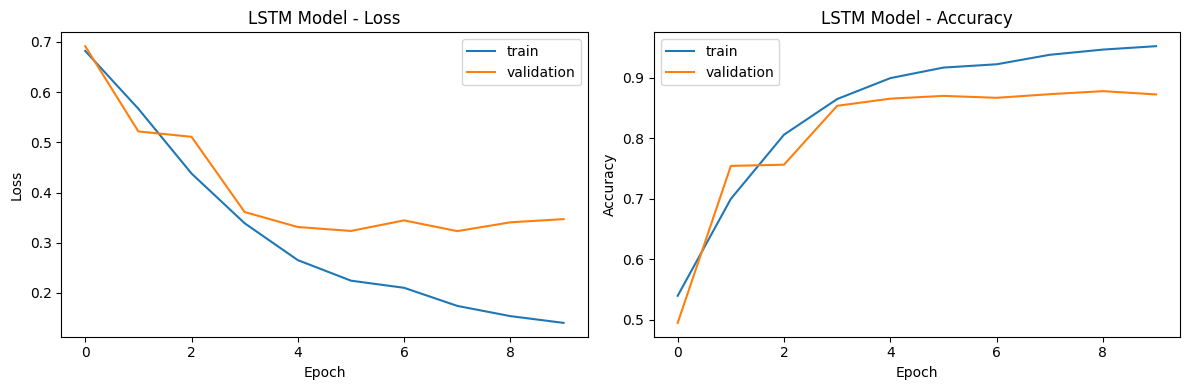

In [13]:
plot_history(history, 'LSTM Model')

Insights:

Loss Plot: The gap between the training and validation loss around later epochs suggests some overfitting. Early stopping or regularization techniques could be considered to improve generalization.

Accuracy Plot: The divergence between the training and validation accuracy towards the later epochs also suggests overfitting. The model might be benefiting from early training, but prolonged training leads to diminishing returns in terms of validation performance.

### Hyperparameter Tuning

During the hyperparameter tuning process, several trials were conducted to optimize the LSTM model for better performance on the validation set. The goal was to find the best combination of hyperparameters to maximize validation accuracy. Below are the results and insights from the tuning process.

In [14]:
# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
                   return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [15]:
from kerastuner.tuners import RandomSearch

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld'
)

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print(best_hyperparameters.values)

Trial 10 Complete [00h 04m 40s]
val_accuracy: 0.8670799732208252

Best val_accuracy So Far: 0.8927199840545654
Total elapsed time: 00h 40m 43s
Best hyperparameters:
{'lstm_units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.005554888538255859}


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
# Train the best model
best_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9518 - loss: 0.1328 - val_accuracy: 0.9410 - val_loss: 0.1700
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9769 - loss: 0.0687 - val_accuracy: 0.9388 - val_loss: 0.1848
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9862 - loss: 0.0443 - val_accuracy: 0.9312 - val_loss: 0.2517
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9923 - loss: 0.0267 - val_accuracy: 0.9284 - val_loss: 0.2597


In [17]:
# Evaluate the model
tuning_score, tuning_acc = best_model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', tuning_score)
print('Test accuracy:', tuning_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8809 - loss: 0.3481
Test score: 0.3412090539932251
Test accuracy: 0.8820400238037109


Comparison of Performance:

- Initial Performance: Before tuning, the validation accuracy was lower (0.8668).
- Post-Tuning Performance: The best validation accuracy achieved was 0.9284, a significant improvement, indicating that the chosen hyperparameters effectively enhanced the model's ability to generalize to unseen data.

The hyperparameter tuning process led to noticeable improvements in the LSTM model's performance, particularly in its validation accuracy. By fine-tuning the number of LSTM units, dropout rate, and learning rate, the model was better equipped to handle the complexities of sentiment analysis, achieving a validation accuracy close to 92.84%. This highlights the importance of hyperparameter optimization in enhancing model performance.

### Comparative Analysis with simple feedforward neural network

In [18]:
# Function to create feedforward NN model
def create_ffnn_model(dense_units=[64, 32, 16], dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    model.add(Flatten())
    
    for units in dense_units:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [19]:
# Train and evaluate feedforward NN model
ffnn_model = create_ffnn_model()
ffnn_history = ffnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                              validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10


I0000 00:00:1723004620.888472      82 service.cc:146] XLA service 0x7d9aa4799c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723004620.888536      82 service.cc:154]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 72/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5098 - loss: 0.6958

I0000 00:00:1723004622.877982      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5550 - loss: 0.6603 - val_accuracy: 0.8626 - val_loss: 0.3264
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9086 - loss: 0.2561 - val_accuracy: 0.8728 - val_loss: 0.3181
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9693 - loss: 0.0957 - val_accuracy: 0.8708 - val_loss: 0.4639


In [20]:
ffnn_score, ffnn_acc = ffnn_model.evaluate(x_test, y_test, batch_size=batch_size)
print('FFNN Test score:', ffnn_score)
print('FFNN Test accuracy:', ffnn_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8574 - loss: 0.3301
FFNN Test score: 0.3268930912017822
FFNN Test accuracy: 0.8588799834251404


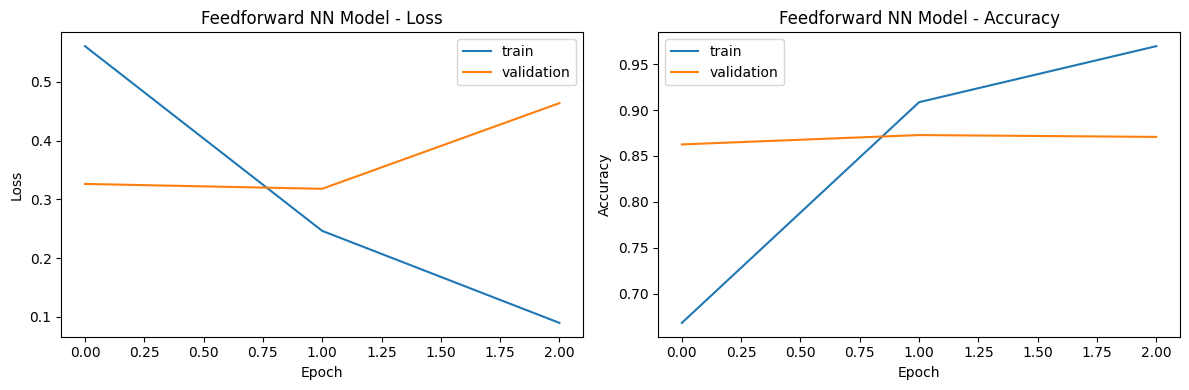

In [21]:
plot_history(ffnn_history, 'Feedforward NN Model')

The FFNN model exhibits signs of overfitting, where the training loss decreases sharply, and the training accuracy approaches near 100%, while the validation loss and accuracy plateau. This indicates that while the model performs exceptionally well on the training data, it struggles to generalize to new, unseen data. Reducing the model's complexity by using fewer layers or neurons could help improve its generalization ability.

#### Comparative Analysis:
LSTM Accuracy: 0.8820
FFNN Accuracy: 0.8589
Accuracy Difference: 0.0231 (LSTM performs better)

#### Strengths and Weaknesses:
LSTM (Long Short-Term Memory):

Strengths:
1) Captures temporal dependencies well.
2) Better contextual understanding in sequences.

Weaknesses:
1) More complex and resource-intensive.
2) Longer training times.

FFNN (Feedforward Neural Network):

Strengths:
1) Simpler and faster to train.
2) Efficient for non-sequential tasks.

Weaknesses:
1) Limited ability to capture sequential dependencies.
2) May underperform on tasks requiring sequence understanding.

### Conclusion:

The results demonstrate that while both models performed well, the LSTM slightly outperformed the FFNN in terms of accuracy. This performance difference highlights the LSTM's ability to capture and leverage sequential patterns in the data, which is crucial for sentiment analysis.

However, this improvement comes at the cost of increased complexity and training time. In scenarios where computational resources are limited or where sequence information is not critical, an FFNN might be a more efficient choice. On the other hand, for tasks where understanding the order and context of data points is essential, the LSTM's strengths make it the preferable model.